## Time to get your hands dirty. Handwritten digits.

Sometimes you might want to apply multiple ML techniques. For example, just because you have labels in your training data doesn't mean that a regression algorithm will work very well.  So, you might want to start with a clustering or dimensional reduction algorithm first.

Here we're going to use the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database). This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face. 

Let's load the dataset first.

### Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results 

*Note*. Isomap is very recent. It was introduced by [Tenenbaum et al (2000)](https://www.science.org/doi/10.1126/science.290.5500.2319) ---a paper that has something like $1.5\times 10^4$ [citations](https://www.science.org/doi/full/10.1126/science.290.5500.2319).


In [1]:
import numpy as np
from sklearn import datasets
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler
from matplotlib import offsetbox

In [2]:
digits = datasets.load_digits()
print(len(digits.images))
print(digits.keys())
print(digits.DESCR)

1797
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps a

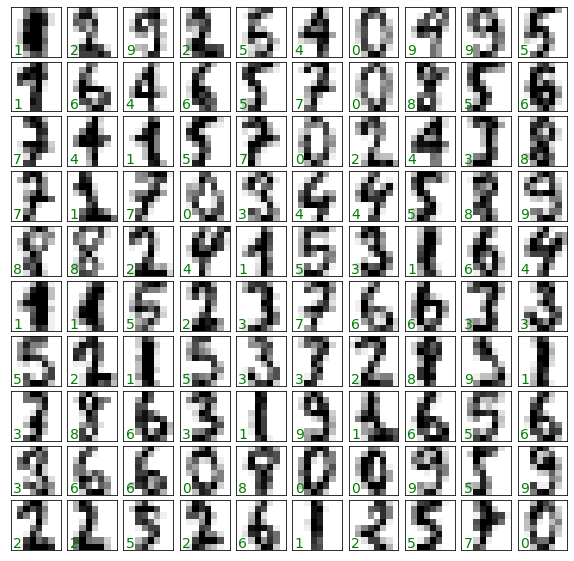

In [3]:
fig, axes = plt.subplots(10,10, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = random.sample(range(0, len(digits.images)), 100) 
chosen_images = np.array([digits.images[c] for c in mychoices])

for i, ax in enumerate(axes.flat):
    ax.imshow(chosen_images[i], 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    

In [4]:
data = digits.data
target = digits.target

(1797, 2)


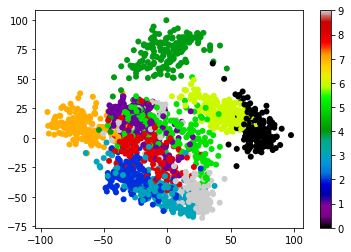

In [5]:
n_components = 2
n_neighbors = 30

embedding = Isomap(n_neighbors = n_neighbors, n_components = n_components)
digits_transformed = embedding.fit_transform(data, target)
print(digits_transformed.shape)

plt.scatter(digits_transformed[:,0], digits_transformed[:,1], 
            c=target, cmap="nipy_spectral", edgecolor="None")
plt.colorbar()

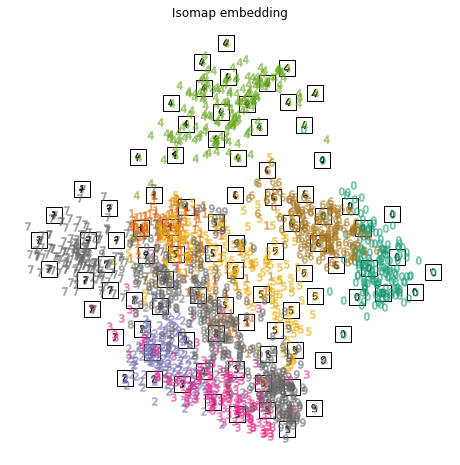

In [6]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import offsetbox

def plot_embedding(X):
    _, ax = plt.subplots(figsize = (8,8))
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[target == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title("Isomap embedding")
    ax.axis("off")


plot_embedding(digits_transformed)    


### Tasks. Part 2. Supervised Learning: Classification on Digits
Now we want to classify the dataset.

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need sklearn.model_selection.train_test_split.

5) Use a simple Logistic Regression which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag solver='sag', the default solver had a bug, at least in my version.

6) Compute the accuracy (sklearn.metrics.accuracy_score) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7) The accuracy is a single number doesn't tell us where we've gone wrong. Plot the confusion matrix as we did above. What are the digits that are more challenging to identify, does it make sense?


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [8]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.20, random_state = 5)
data_train, data_test.shape, target_train.shape, target_test.shape

(array([[ 0.,  0., 10., ...,  3.,  0.,  0.],
        [ 0.,  0.,  7., ...,  4.,  0.,  0.],
        [ 0.,  0.,  7., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0., 10., ...,  1.,  0.,  0.],
        [ 0.,  0., 10., ..., 10.,  0.,  0.]]),
 (360, 64),
 (1437,),
 (360,))

In [9]:
lr = LogisticRegression(solver = 'sag', penalty = 'l2', fit_intercept = True, multi_class = 'auto', max_iter=10000)
lr.fit(data_train, target_train)
target_pred_test = lr.predict(data_test)
target_pred_train = lr.predict(data_train)
test_score = lr.score(data_test, target_test)
train_score = lr.score(data_train, target_train)

Accuracy on training set = 1.0
Accuracy on validation set = 0.9583333333333334


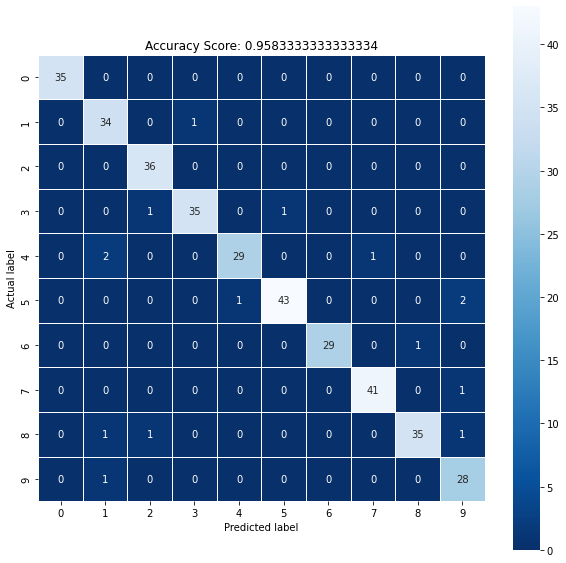

In [10]:
test_accuracy = accuracy_score(target_test, target_pred_test)
train_accuracy = accuracy_score(target_train, target_pred_train)
cm = confusion_matrix(target_test, target_pred_test)

print('Accuracy on training set = ' + str(train_accuracy))
print('Accuracy on validation set = ' + str(test_accuracy))

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(test_score)
plt.title(all_sample_title);

In [11]:
wrong_label = np.where(target_test != target_pred_test)
print(wrong_label)
wrong_digits = target_test[wrong_label]
print(wrong_digits)

(array([ 37,  38,  54,  78,  79, 119, 139, 168, 208, 227, 233, 252, 270,
       286, 321]),)
[5 4 6 3 5 5 7 4 8 8 8 1 3 9 4]


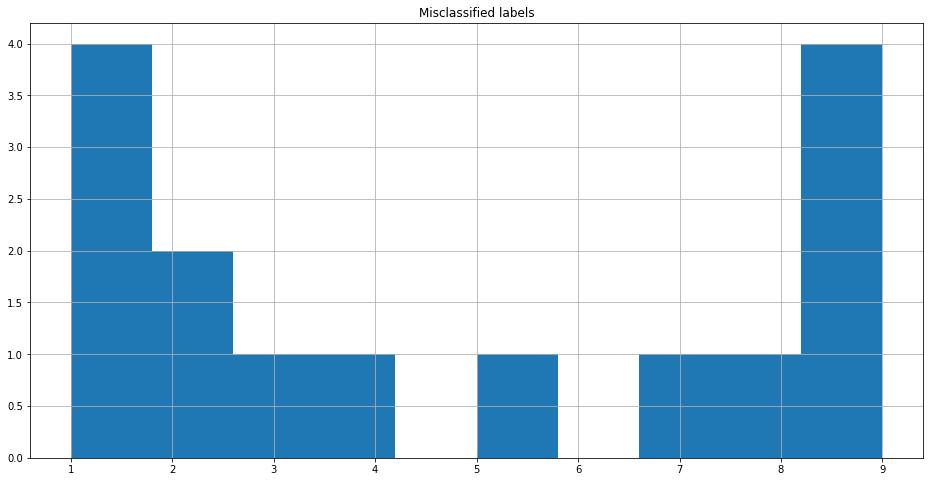

In [23]:
target_pred_dataset = lr.predict(data)

wrong = np.where(target_pred_dataset != target)
wrong_digits_dataset = target_pred_dataset[wrong]

fig = plt.figure(figsize = (16,8))

plt.hist(wrong_digits_dataset)
plt.title('Misclassified labels')
plt.grid()

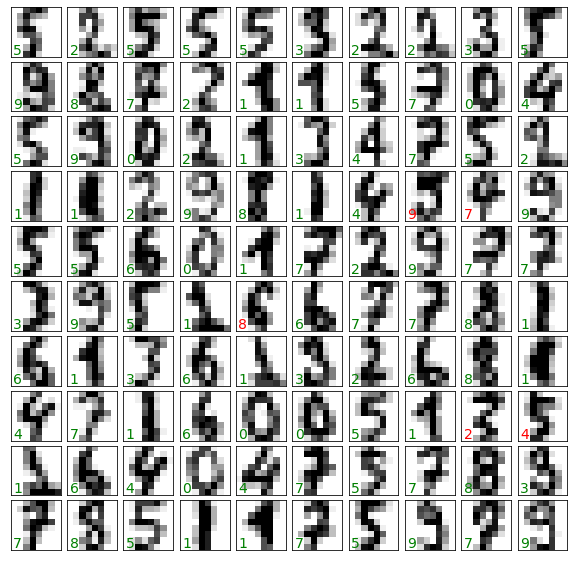

In [26]:
#wrong labels in first reduced datset
fig, axes = plt.subplots(10,10, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(data_test[i].reshape(8,8), cmap='binary')
    if (target_pred_test[i] == target_test[i]):
        color = 'green'
    else:
        color = 'red'
    ax.text(0.05, 0.05, str(target_pred_test[i]),transform=ax.transAxes, color=color, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])